In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2001-01-01'
end = '2022-08-30'
stock = data.DataReader('ITC.NS','yahoo',start,end)

In [3]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-01,20.177776,19.719999,19.977777,19.863333,24715935.0,12.412157
2001-01-02,20.222221,19.906666,19.906666,20.158888,31447890.0,12.596842
2001-01-03,21.216665,20.000000,20.088888,20.986666,164613915.0,13.114100
2001-01-04,21.333332,20.480000,21.100000,20.566666,63363600.0,12.851648
2001-01-05,20.959999,20.401112,20.511110,20.808887,74853135.0,13.003012


In [4]:
 stock.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-18,296.299988,293.750000,295.000000,295.299988,11315876.0,295.299988
2022-07-19,295.600006,292.700012,295.000000,294.600006,9188419.0,294.600006
2022-07-20,299.500000,293.600006,294.899994,298.200012,15789281.0,298.200012
2022-07-21,302.200012,298.000000,299.000000,299.549988,16042840.0,299.549988
2022-07-22,302.500000,298.100006,300.000000,300.549988,9967545.0,300.549988


In [5]:
stock = stock.reset_index()
stock = stock.drop(['Date','Adj Close'],axis =1)

In [6]:
stock.head()

,High,Low,Open,Close,Volume
0,20.177776,19.719999,19.977777,19.863333,24715935.0
1,20.222221,19.906666,19.906666,20.158888,31447890.0
2,21.216665,20.000000,20.088888,20.986666,164613915.0
3,21.333332,20.480000,21.100000,20.566666,63363600.0
4,20.959999,20.401112,20.511110,20.808887,74853135.0


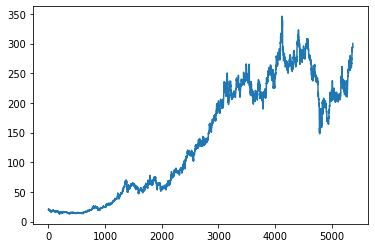

In [7]:
 plt.plot(stock.Open)

In [8]:
MA100 = stock.Open.rolling(100).mean()
MA100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5370    259.750500
5371    260.550500
5372    261.331499
5373    262.221499
5374    263.106499
Name: Open, Length: 5375, dtype: float64

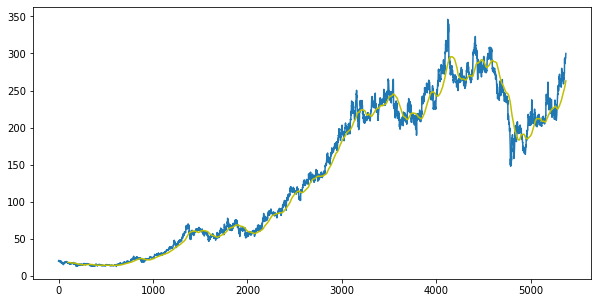

In [9]:
plt.figure(figsize = (10,5))
plt.plot(stock.Open)
plt.plot(MA100,'y')

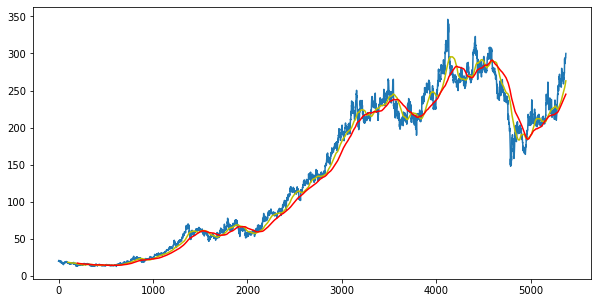

In [10]:
MA200 = stock.Open.rolling(200).mean()
plt.figure(figsize = (10,5))
plt.plot(stock.Open)
plt.plot(MA100,'y')
plt.plot(MA200,'r')

In [11]:
stock_data = stock.drop(["High","Low","Volume"] , axis=1,inplace =False)
stock_data.head()

,Open,Close
0,19.977777,19.863333
1,19.906666,20.158888
2,20.088888,20.986666
3,21.100000,20.566666
4,20.511110,20.808887


In [12]:
from sklearn.model_selection import train_test_split
stock_training,stock_testing = train_test_split(stock_data,test_size =0.20)

In [13]:
print(len(stock_training))
print(len(stock_testing))

4300
1075


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
training_array = scaler.fit_transform(stock_training)
training_array.shape

(4300, 2)

In [16]:
x_train = []
y_train = []

for i in range(100, training_array.shape[0]):
               x_train.append(training_array[i-100:i])
               y_train.append(training_array[i,0])
               
x_train , y_train = np.array(x_train),np.array(y_train)               

In [17]:
y_train.shape

(4200,)

In [18]:
from keras.layers import Dense, Dropout ,LSTM
from keras.models import Sequential

In [19]:
model = Sequential()

model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True , input_shape = (x_train.shape[1],2)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 150 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 200 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 250 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.6))

model.add(LSTM(units = 300 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.7))

model.add(LSTM(units = 350 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.8))

model.add(LSTM(units = 400 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.9))

model.add(LSTM(units = 450 , activation = 'relu' ))
model.add(Dropout(0.95))


model.add(Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10600     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          60400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 150)          150600    
                                                                 
 dropout_2 (Dropout)         (None, 100, 150)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 200)          2

In [21]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train, y_train , epochs = 1)

132/132 [==============================] - 929s 7s/step - loss: 0.1097


In [22]:
model.save('double.h5')

In [23]:
stock_testing.head()

,Open,Close
4073,279.700012,279.500000
1844,63.683334,65.099998
740,19.775555,20.004444
3234,217.933334,215.666672
4976,215.250000,213.550003


In [24]:
past100days = stock_training.tail(100)

In [25]:
final_df = past100days.append(stock_testing , ignore_index =True)

In [26]:
input_data = scaler.fit_transform(final_df)

In [27]:
input_data.shape

(1175, 2)

In [28]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [29]:
x_test , y_test = np.array(x_test), np.array(y_test)

In [30]:
x_test.shape

(1075, 100, 2)

In [37]:
x_test.head

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [31]:
y_test.shape

(1075,)

In [32]:
y_predicted = model.predict(x_test)

34/34 [==============================] - 47s 1s/step


In [33]:
y_predicted.shape

(1075, 1)

In [34]:
scaler.scale_

array([0.00310666, 0.00316613])

In [35]:
scale_factor = 1/0.00571592
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

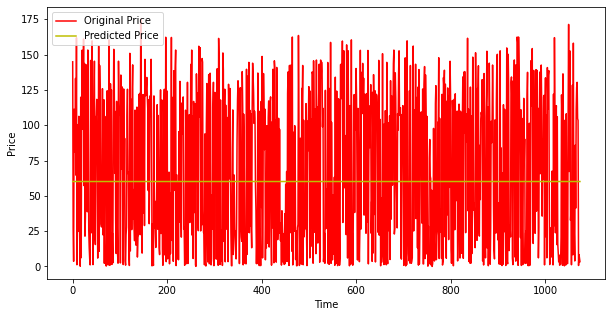

In [36]:
plt.figure(figsize = (10,5))
plt.plot(y_test,'r', label = 'Original Price')
plt.plot(y_predicted,'y',label = 'Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()